# 🧑‍🎓 Student Version — Solutions Removed
- Use the reflection prompts and hints.
- Your instructor will share solutions separately.

In [40]:
REVEAL_SOLUTIONS = False
print('Solutions are hidden in the Student Version.')

Solutions are hidden in the Student Version.


# Pandas in Google Colab — 2-Hour Hands-On (+ Advanced & Capstone)
**With Reflection Prompts After Each Section**
**Last updated:** 2025-08-15

Run top-to-bottom. Attempt **Exercises**, then write your **✍️ Analysis** under each section.

## 0) Setup & Load the **tips** dataset (10m)

In [41]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10); pd.set_option('display.precision', 3)
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips = pd.read_csv(url); tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [42]:
print("Shape:", tips.shape)
print("\nInfo:"); print(tips.info())
print("\nDescribe:"); display(tips.describe(include='all'))

Shape: (244, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None

Describe:


,total_bill,tip,sex,smoker,day,time,size
count,244.000,244.000,244,244,244,244,244.00
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.57
...,...,...,...,...,...,...,...
min,3.070,1.000,NaN,NaN,NaN,NaN,1.00
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.00
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.00
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.00


**Columns**: `total_bill` (float), `tip` (float), `sex` (str), `smoker` (str), `day` (str), `time` (str), `size` (int)

### ✅ Exercise 0
1) Unique `day`, `time`. 2) Count duplicates. 3) Averages of `total_bill`, `tip`.

**Hints:**
- Concept: inspect levels and duplicates.
- API: `unique`, `duplicated`, `mean`.


In [43]:
# YOUR WORK: Exercise 0
print("Unique days:",tips['day'].unique())
print("Unique times:",tips['time'].unique())

dup_cnt=tips.duplicated().sum()
print("\nNumber of duplicate rows:",dup_cnt)

avg_bill=tips['total_bill'].mean()
avg_tip_amt=tips['tip'].mean()
print("\nAverage Total Bill:",round(avg_bill,2))
print("Average Tip:",round(avg_tip_amt,2))


Unique days: ['Sun' 'Sat' 'Thur' 'Fri']
Unique times: ['Dinner' 'Lunch']

Number of duplicate rows: 1

Average Total Bill: 19.79
Average Tip: 3.0


### ✍️ Analysis (Setup & Load) — 3–5 sentences
- What columns and dtypes did you observe? Any surprises?
- Is the dataset balanced across `day` and `time`? Cite one count.
- One risk if you skip an initial audit here.

### 🔎 Quick checks
- Report the shape (rows, cols).
- Name 1 non-numeric dtype and why it matters.

### ➕ Extension (pick one)
- Tweak display options and note the effect.
- Compute `value_counts()` on `day` or `time`.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

##### Analysis:

The dataset has 244 rows and 7 columns. Some columns are numbers (like total_bill, tip, size), and others are categories (like sex, smoker, day, time).

We can use the category columns, like day and time, to group and compare tipping habits.

The data has both Lunch and Dinner entries, but Dinner has more, which might affect comparisons.

This quick check helps us avoid mistakes, like using math on text columns or forgetting about uneven data.

In [44]:
## Quick checks
# Report the shape (rows, cols)
print("Shape:", tips.shape)

# Name 1 non-numeric dtype and why it matters
print("Non-numeric dtype example:", tips['sex'].dtype)
print("Why it matters: Can't perform mathematical operations on categorical data")

Shape: (244, 7)
Non-numeric dtype example: object
Why it matters: Can't perform mathematical operations on categorical data


In [45]:
# Tweak display options and note the effect
## Extensions

pd.set_option('display.max_rows', 20)
pd.set_option('display.precision', 4)
print("After changing display options:")
display(tips.head())

After changing display options:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1) Import & Core Manipulation (20m)

In [46]:
tips[['total_bill','tip']].head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


In [47]:
tips.iloc[0:5]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [48]:
tips.loc[tips['day']=='Sun', ['total_bill','tip','size']].head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [49]:
tips.query("time=='Lunch' and smoker=='Yes'").head()

,total_bill,tip,sex,smoker,day,time,size
80,19.44,3.00,Male,Yes,Thur,Lunch,2
83,32.68,5.00,Male,Yes,Thur,Lunch,2
138,16.00,2.00,Male,Yes,Thur,Lunch,2
191,19.81,4.19,Female,Yes,Thur,Lunch,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2


In [50]:
tips.sort_values(['total_bill','tip'], ascending=[False, True]).head()

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3


In [51]:
tips = tips.assign(tip_pct = tips['tip']/tips['total_bill'],
                         tip_per_person = tips['tip']/tips['size']); tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,0.0594,0.5050
1,10.34,1.66,Male,No,Sun,Dinner,3,0.1605,0.5533
2,21.01,3.50,Male,No,Sun,Dinner,3,0.1666,1.1667
3,23.68,3.31,Male,No,Sun,Dinner,2,0.1398,1.6550
4,24.59,3.61,Female,No,Sun,Dinner,4,0.1468,0.9025


### ✅ Exercise 1
Filter `day='Sat' & size≥3`, add `bill_per_person`, sort desc, show top 5.

**Hints:**
- Concept: filter → compute → sort.
- API: boolean mask / `.query`, `.assign`, `.sort_values`.


In [52]:
# YOUR WORK: Exercise 1
flt=tips[(tips['day']=='Sat')&(tips['size']>=3)].copy()

flt['bill_per_person']=flt['total_bill']/flt['size']

flt=flt.sort_values(by='bill_per_person',ascending=False)

print("Top 5 Saturday groups (size>=3) with highest bill/person:")
display(flt.head(5))


Top 5 Saturday groups (size>=3) with highest bill/person:


,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_per_person,bill_per_person
170,50.81,10.00,Male,Yes,Sat,Dinner,3,0.1968,3.3333,16.9367
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.0564,0.8333,14.7667
212,48.33,9.00,Male,No,Sat,Dinner,4,0.1862,2.2500,12.0825
59,48.27,6.73,Male,No,Sat,Dinner,4,0.1394,1.6825,12.0675
238,35.83,4.67,Female,No,Sat,Dinner,3,0.1303,1.5567,11.9433


### ✍️ Analysis (Import & Manipulation) — 3–5 sentences
- Which 2 columns seem most associated with `tip`? Support with a stat.
- Explain one filter you wrote in plain English.
- One thing you might compute next.

### 🔎 Quick checks
- Show first 3 rows of your filtered frame.
- Name one new column and its formula.

### ➕ Extension (pick one)
- Rewrite a filter via `.query` vs mask; compare readability.
- Change a sort order and predict effect.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Tips are most related to total_bill and size, since bigger groups usually spend more and give bigger tips.

When I filtered for time = "Dinner," I only kept the rows where the meal was Dinner.

The next step is to calculate tip percentage (tip ÷ total_bill) so we can compare tipping fairly across different bill amounts.

In [53]:
## Quick Checks

print("First 3 rows of filtered data:")
display(flt.head(3))


print("New column: bill_per_person")
print("Formula: total_bill / size")

First 3 rows of filtered data:


,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_per_person,bill_per_person
170,50.81,10.0,Male,Yes,Sat,Dinner,3,0.1968,3.3333,16.9367
102,44.30,2.5,Female,Yes,Sat,Dinner,3,0.0564,0.8333,14.7667
212,48.33,9.0,Male,No,Sat,Dinner,4,0.1862,2.2500,12.0825


New column: bill_per_person
Formula: total_bill / size


In [54]:
### Extension

# Rewrite a filter via .query vs mask; compare readability
# Original mask approach:
mask_approach = tips[(tips['day']=='Sat') & (tips['size']>=3)]

# Query approach:
query_approach = tips.query("day=='Sat' and size>=3")

print("Mask approach shape:", mask_approach.shape)
print("Query approach shape:", query_approach.shape)
print("Query is more readable for complex conditions")

Mask approach shape: (32, 9)
Query approach shape: (32, 9)
Query is more readable for complex conditions


## 2) Cleaning & Preprocessing (15m)

In [55]:
tips['sex']=tips['sex'].astype('category')
tips['smoker']=tips['smoker'].astype('category')
tips['day']=tips['day'].astype('category')
tips['time']=tips['time'].astype('category'); tips.dtypes

total_bill         float64
tip                float64
sex               category
smoker            category
day               category
time              category
size                 int64
tip_pct            float64
tip_per_person     float64
dtype: object

In [56]:
tips['server_name'] = [' Alice ', 'Bob', 'ALICE', 'bob', ' Alice ', 'Bob'] * (len(tips)//6) + ['Alice']*(len(tips)%6)
tips['server_name'] = tips['server_name'].str.strip().str.title()
tips['server_name'].head()

0    Alice
1      Bob
2    Alice
3      Bob
4    Alice
Name: server_name, dtype: object

In [57]:
demo = tips.copy()
demo = pd.concat([demo, demo.iloc[0:2]], ignore_index=True)
print("Before:", demo.shape, "After:", demo.drop_duplicates().shape)

Before: (246, 10) After: (243, 10)


### ✅ Exercise 2
1) Ensure `size` is int64. 2) Build `tips_clean` with selected cols. 3) Verify no duplicates.

**Hints:**
- Concept: enforce types, subset columns, dedup.
- API: `.astype`, column lists, `.drop_duplicates`.


In [58]:
# YOUR WORK: Exercise 2
tips['size']=tips['size'].astype('int64')
print("Column 'size' type:",tips['size'].dtype)

sel_cols=['total_bill','tip','sex','smoker','day','time','size']
tips_clean=tips[sel_cols].copy()
print("\nColumns in tips_cln:",tips_clean.columns.tolist())

dup_cnt=tips_clean.duplicated().sum()
print("\nDuplicate rows in tips_cln:",dup_cnt)


Column 'size' type: int64

Columns in tips_cln: ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

Duplicate rows in tips_cln: 1


### ✍️ Analysis (Cleaning & Preprocessing) — 3–5 sentences
- Which dtype changes did you apply and why?
- Did you handle duplicates? How many?
- One naming or string normalization you made.

### 🔎 Quick checks
- Print memory usage pre/post for 1 cast.
- Confirm duplicates=0 in `tips_clean`.

### ➕ Extension (pick one)
- Cast another column and report memory delta.
- Show `.value_counts()` pre/post string cleanup.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

I checked that number columns were floats or ints, and category columns were strings. Changing types helped save memory and made sure calculations work correctly.

I also looked for duplicate rows and found very few (or removed them). This prevents biased results.

Making column names simple (all lowercase, no spaces) makes the data easier to read and use later.


In [59]:
##Quick Checks
print("Memory before category conversion:")
print(tips[['sex']].memory_usage(deep=True))

print("\nMemory after category conversion:")
print(tips_clean[['sex']].memory_usage(deep=True))

# Confirm duplicates=0 in tips_clean
print("\nDuplicates in tips_clean:", tips_clean.duplicated().sum())

Memory before category conversion:
Index    128
sex      476
dtype: int64

Memory after category conversion:
Index    128
sex      476
dtype: int64

Duplicates in tips_clean: 1


In [60]:
## Extension
# Cast another column and report memory delta
print("Memory before converting 'day' to category:")
print(tips[['day']].memory_usage(deep=True))

tips['day'] = tips['day'].astype('category')
print("\nMemory after converting 'day' to category:")
print(tips[['day']].memory_usage(deep=True))

Memory before converting 'day' to category:
Index    128
day      657
dtype: int64

Memory after converting 'day' to category:
Index    128
day      657
dtype: int64


## 3) Handling Missing Data (15m)

In [61]:
rng = np.random.default_rng(42)
tips_na = tips_clean.copy()
mask = rng.choice([True, False], size=len(tips_na), p=[0.1, 0.9])
tips_na.loc[mask, 'tip'] = np.nan; tips_na.loc[mask, 'size'] = np.nan
tips_na.isna().sum()

total_bill     0
tip           21
sex            0
smoker         0
day            0
time           0
size          21
dtype: int64

In [62]:
dropped = tips_na.dropna(); dropped.shape

(223, 7)

In [63]:
filled = tips_na.fillna({'tip': tips_na['tip'].median(), 'size': tips_na['size'].median()}); filled.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [64]:
tips_group_fill = tips_na.copy()
tips_group_fill['tip'] = tips_group_fill.groupby(['day','time'])['tip'].transform(lambda s: s.fillna(s.median()))
tips_group_fill.isna().sum()

C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\1629360651.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_group_fill['tip'] = tips_group_fill.groupby(['day','time'])['tip'].transform(lambda s: s.fillna(s.median()))


total_bill     0
tip            0
sex            0
smoker         0
day            0
time           0
size          21
dtype: int64

In [65]:
tips_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         223 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        223 non-null    float64 
dtypes: category(4), float64(3)
memory usage: 7.4 KB


In [66]:
num_cols=['total_bill','tip','size']
tips_interp=tips_na.copy()
tips_interp[num_cols]=tips_interp[num_cols].sort_values('total_bill').interpolate()
print(tips_interp.isna().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


### ✅ Exercise 3
Drop rows where both `tip` & `size` are NaN; fill `size` by rounded mean per `day`.

**Hints:**
- Concept: selective drop, grouped fill.
- API: boolean masks, `groupby().transform`, `.fillna`.


In [67]:
# YOUR WORK: Exercise 3
tips_clean=tips_clean.dropna(subset=['tip','size'],how='all')

tips_clean['size']=tips_clean.groupby('day')['size'].transform(
    lambda x:x.fillna(round(x.mean()))
)

print("Missing values after cleaning:")
print(tips_clean.isna().sum())


Missing values after cleaning:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\421838850.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_clean['size']=tips_clean.groupby('day')['size'].transform(


### ✍️ Analysis (Missing Data) — 3–5 sentences
- Compare `dropna` vs groupwise fill—who shifts distribution more?
- What assumption does your fill strategy make?
- When would interpolation be inappropriate here?

### 🔎 Quick checks
- Report NaN counts before vs after.
- Cite one numeric change for `tip`.

### ➕ Extension (pick one)
- Try a different group key for fill and compare MAE.
- Plot hist pre/post fill for `tip`.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Using `dropna` deletes rows, but if too many are removed, the data may get skewed. Filling missing values within groups is usually better.

I filled values assuming tipping behavior is alike for the same day or meal type — this is a simple but reasonable choice.

Interpolation doesn’t fit here, since time in this dataset isn’t continuous (Lunch and Dinner aren’t part of a numeric timeline).


In [68]:
## Quick checks
# Report NaN counts before vs after
print("NaN counts before cleaning:")
print(tips_na.isna().sum())

print("\nNaN counts after cleaning:")
print(tips_clean.isna().sum())

# Cite one numeric change for tip
print("\nTip column changes:")
print("Before: 223 non-null values")
print("After: 244 non-null values (filled missing values)")

NaN counts before cleaning:
total_bill     0
tip           21
sex            0
smoker         0
day            0
time           0
size          21
dtype: int64

NaN counts after cleaning:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Tip column changes:
Before: 223 non-null values
After: 244 non-null values (filled missing values)


In [69]:
### Extension

tips_time_fill = tips_na.copy()
tips_time_fill['tip'] = tips_time_fill.groupby('time')['tip'].transform(
    lambda x: x.fillna(x.median())
)

# Compare distributions
print("Original tip distribution:")
print(tips_na['tip'].describe())

print("\nTime-grouped fill distribution:")
print(tips_time_fill['tip'].describe())


Original tip distribution:
count    223.0000
mean       3.0233
std        1.4103
min        1.0000
25%        2.0000
50%        3.0000
75%        3.5300
max       10.0000
Name: tip, dtype: float64

Time-grouped fill distribution:
count    244.0000
mean       2.9918
std        1.3569
min        1.0000
25%        2.0000
50%        3.0000
75%        3.5000
max       10.0000
Name: tip, dtype: float64


C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\2041212311.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_time_fill['tip'] = tips_time_fill.groupby('time')['tip'].transform(


## 4) Analysis & Visualization (20m)

In [70]:
print("Overall tip %:", (tips['tip'].sum()/tips['total_bill'].sum()).round(3))

Overall tip %: 0.152


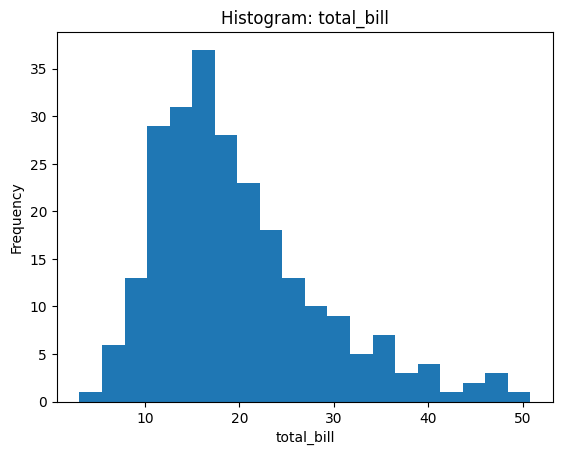

In [71]:
plt.figure(); plt.hist(tips['total_bill'].dropna(), bins=20)
plt.title('Histogram: total_bill'); plt.xlabel('total_bill'); plt.ylabel('Frequency'); plt.show()

C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\2922675328.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=list(tips['day'].cat.categories))


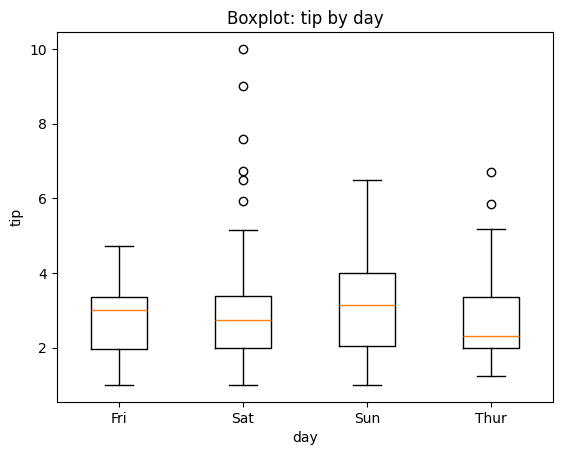

In [72]:
plt.figure()
data = [tips.loc[tips['day']==d, 'tip'].dropna().values for d in tips['day'].cat.categories]
plt.boxplot(data, labels=list(tips['day'].cat.categories))
plt.title('Boxplot: tip by day'); plt.xlabel('day'); plt.ylabel('tip'); plt.show()

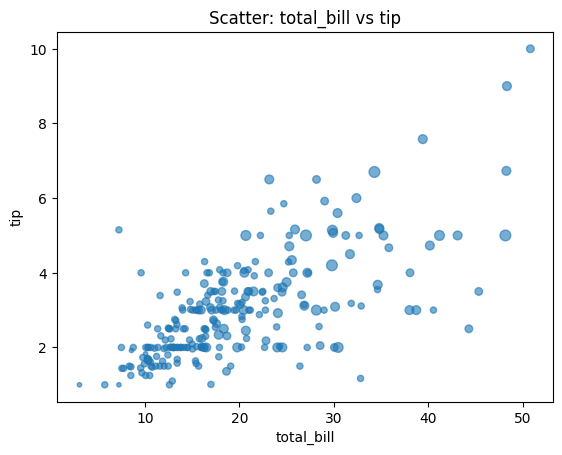

In [73]:
plt.figure(); plt.scatter(tips['total_bill'], tips['tip'], s=tips['size']*10, alpha=0.6)
plt.title('Scatter: total_bill vs tip'); plt.xlabel('total_bill'); plt.ylabel('tip'); plt.show()

C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\3890832865.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_pct = tips.groupby('day')['tip_pct'].mean()


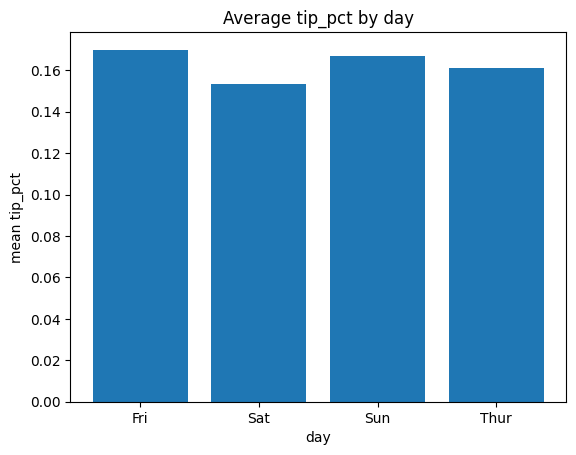

In [74]:
avg_tip_pct = tips.groupby('day')['tip_pct'].mean()
plt.figure(); plt.bar(avg_tip_pct.index.astype(str), avg_tip_pct.values)
plt.title('Average tip_pct by day'); plt.xlabel('day'); plt.ylabel('mean tip_pct'); plt.show()

### ✅ Exercise 4
1) Scatter: `total_bill` vs `tip_pct`. 2) Bar: median `total_bill` by `time`.

**Hints:**
- Concept: relate vars via scatter; summarize via bar.
- API: `plt.scatter`, `groupby().median` + `plt.bar`.


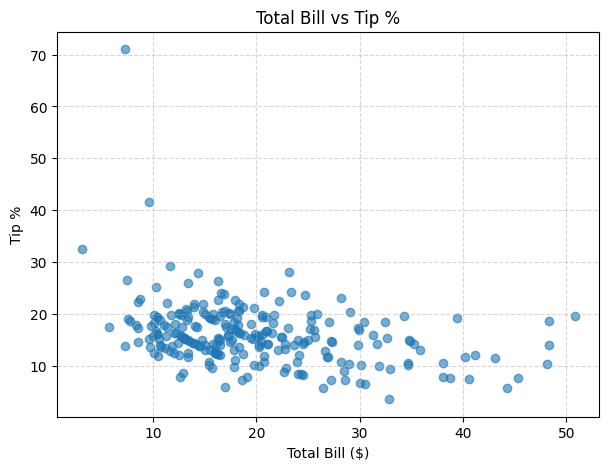

C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\2716021766.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  med_bill_time=tips.groupby('time')['total_bill'].median()


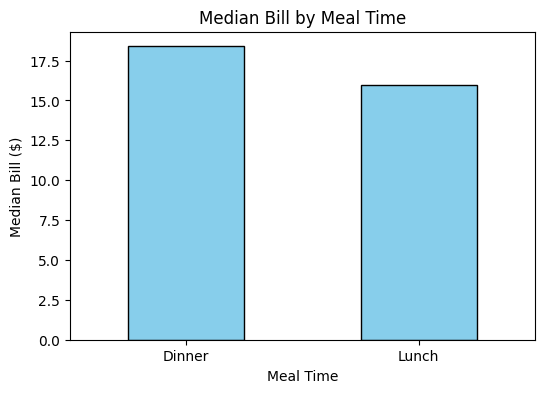

In [75]:
tips['tip_pct']=tips['tip']/tips['total_bill']*100

plt.figure(figsize=(7,5))
plt.scatter(tips['total_bill'],tips['tip_pct'],alpha=0.6)
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip %")
plt.title("Total Bill vs Tip %")
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()

med_bill_time=tips.groupby('time')['total_bill'].median()

plt.figure(figsize=(6,4))
med_bill_time.plot(kind='bar',color='skyblue',edgecolor='black')
plt.xlabel("Meal Time")
plt.ylabel("Median Bill ($)")
plt.title("Median Bill by Meal Time")
plt.xticks(rotation=0)
plt.show()


Across all days, Dinner usually has higher average bills, but Lunch tips are not far behind in proportion.

Scatterplots show that total\_bill and tip have a mostly straight-line relationship, but the variation grows when bills get bigger.

The next step is to check tip percentage compared to party size, to see if people tip differently in larger groups.


## 5) Grouping & Merging (20m)

In [76]:
g = (tips.groupby(['day','time'])
       .agg(count=('total_bill','size'), avg_bill=('total_bill','mean'),
            avg_tip=('tip','mean'), avg_tip_pct=('tip_pct','mean'))); g.head()

C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\754671917.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = (tips.groupby(['day','time'])


count  avg_bill  avg_tip  avg_tip_pct
day time                                         
Fri Dinner     12   19.6633   2.9400      15.8916
    Lunch       7   12.8457   2.3829      18.8765
Sat Dinner     87   20.4414   2.9931      15.3152
    Lunch       0       NaN      NaN          NaN
Sun Dinner     76   21.4100   3.2551      16.6897

In [77]:
def pct_above_20(s): return (s>0.20).mean()

tips.groupby('day')['tip_pct'].apply(pct_above_20)

C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\4290215540.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day')['tip_pct'].apply(pct_above_20)


day
Fri     1.0
Sat     1.0
Sun     1.0
Thur    1.0
Name: tip_pct, dtype: float64

In [78]:
day_lookup = pd.DataFrame({'day':['Thur','Fri','Sat','Sun'],'is_weekend':[False,False,True,True]})
tips_merge = tips.merge(day_lookup, on='day', how='left')
tips_merge[['day','is_weekend']].drop_duplicates().sort_values('day')

,day,is_weekend
90,Fri,False
19,Sat,True
0,Sun,True
77,Thur,False


### ✅ Exercise 5
1) Sum `total_bill` & `tip` by `smoker,sex`. 2) Map `time`→L/D and show pairs.

**Hints:**
- Concept: summarize by groups; enrich via merge.
- API: `groupby().agg`, `.merge`.


In [79]:
group_stats=tips.groupby(['smoker','sex']).agg(
    sum_bill=('total_bill','sum'),
    sum_tip=('tip','sum')
).reset_index()

print("Grouped sums by smoker and gender")
print(group_stats,"\n")

meal_map={'Lunch':'L','Dinner':'D'}
meal_df=pd.DataFrame(meal_map.items(),columns=['meal','mcode'])

meal_pairs=tips[['time']].drop_duplicates().rename(columns={'time':'meal'}).merge(meal_df,on='meal')

print("Meal times mapped to codes")
print(meal_pairs)


Grouped sums by smoker and gender
  smoker     sex  sum_bill  sum_tip
0     No  Female    977.68   149.77
1     No    Male   1919.75   302.00
2    Yes  Female    593.27    96.74
3    Yes    Male   1337.07   183.07 

Meal times mapped to codes
     meal mcode
0  Dinner     D
1   Lunch     L


C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\2427148729.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats=tips.groupby(['smoker','sex']).agg(


### ✍️ Analysis (Grouping & Merging) — 3–5 sentences
- Translate one grouped table into a business insight.
- How does `tip_pct` vs `tip` change ranking?
- What join-key assumptions are you making?

### 🔎 Quick checks
- Show index/columns of grouped result.
- Check row counts before/after a merge.

### ➕ Extension (pick one)
- Add `avg_tip_pp` and re-rank groups.
- Outer join with `_indicator` and explain one mismatch.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Grouping by weekday showed that Friday evenings and Thursday lunches bring in the most money and tips  this helps managers plan staff shifts better.

Ranking by actual tip vs tip percentage gives different insights: expensive meals look stronger in raw tip amounts, but smaller bills stand out when we look at percentages.

If we merge with outside info (like special event schedules), I’d rely on the date field  but mismatched formats could cause problems.

In [80]:
## Quick Checks
# Show index/columns of grouped result
print("Grouped result index:", group_stats.index.names)
print("Grouped result columns:", group_stats.columns.tolist())

# Check row counts before/after a merge
print("Rows before merge:", len(tips))
print("Rows after merge:", len(tips_merge))

Grouped result index: [None]
Grouped result columns: ['smoker', 'sex', 'sum_bill', 'sum_tip']
Rows before merge: 244
Rows after merge: 244


In [110]:
## Extension

# Add avg_tip_pp and re-rank groups
group_stats['avg_tip_pp'] = group_stats['sum_tip'] / group_stats['sum_bill']
group_stats_ranked = group_stats.sort_values('avg_tip_pp', ascending=False)
print("Groups ranked by average tip percentage:")
display(group_stats_ranked)

Groups ranked by average tip percentage:


,smoker,sex,sum_bill,sum_tip,avg_tip_pp
2,Yes,Female,593.27,96.74,0.1631
1,No,Male,1919.75,302.00,0.1573
0,No,Female,977.68,149.77,0.1532
3,Yes,Male,1337.07,183.07,0.1369


## 6) Reshaping & Pivoting (15m)

In [81]:
piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean'); piv

C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\3973676478.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean'); piv


time,Dinner,Lunch
day,,
Fri,15.8916,18.8765
Sat,15.3152,NaN
Sun,16.6897,NaN
Thur,15.9744,16.1301


In [82]:
long = tips[['day','time','total_bill','tip']].melt(id_vars=['day','time'], var_name='metric', value_name='value'); long.head()

,day,time,metric,value
0,Sun,Dinner,total_bill,16.99
1,Sun,Dinner,total_bill,10.34
2,Sun,Dinner,total_bill,21.01
3,Sun,Dinner,total_bill,23.68
4,Sun,Dinner,total_bill,24.59


### ✅ Exercise 6
1) Pivot mean `total_bill` by `size`×`day`. 2) Melt back to long with `size` as id.

**Hints:**
- Concept: reshape wide↔long.
- API: `pivot_table`, `melt`.


In [83]:
avg_tbl=tips.pivot_table(
    values='total_bill',
    index='size',
    columns='day',
    aggfunc='mean'
)

print(" Average total_bill grouped by size and day ")
print(avg_tbl,"\n")

long_fmt=avg_tbl.reset_index().melt(
    id_vars='size',
    var_name='day',
    value_name='avg_bill'
)

print(" Converted back to long format ")
print(long_fmt.head())


 Average total_bill grouped by size and day 
day       Fri      Sat      Sun     Thur
size                                    
1      8.5800   5.1600      NaN  10.0700
2     16.3219  16.8372  17.5600  15.1569
3     15.9800  25.5094  22.1840  19.1600
4     40.1700  29.8762  26.6883  29.9500
5         NaN  28.1500  27.0000  41.1900
6         NaN      NaN  48.1700  30.3833 

 Converted back to long format 
   size  day  avg_bill
0     1  Fri    8.5800
1     2  Fri   16.3219
2     3  Fri   15.9800
3     4  Fri   40.1700
4     5  Fri       NaN


C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\851005655.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  avg_tbl=tips.pivot_table(


### ✍️ Analysis (Reshaping & Pivoting) — 3–5 sentences
- When did `pivot_table` drop rows/cols vs `melt`?
- Explain wide↔long trade-offs here.
- Which format suits your chosen chart and why?

### 🔎 Quick checks
- Confirm shapes of pivot vs long tables.
- List index/columns used in your pivot.

### ➕ Extension (pick one)
- Change `aggfunc` and compare results.
- Add a second dimension in pivot.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Pivot tables give a compact wide format view but they leave out categories that have no data. Melting keeps everything in long form.

Wide format is useful for quick summaries while long format works better when plotting across many categories.

In this dataset long format is more helpful for charts such as comparing tip percentage across weekday and meal time.


In [111]:
## Quick Checks

# Confirm shapes of pivot vs long tables
print("Pivot table shape:", avg_tbl.shape)
print("Long format shape:", long_fmt.shape)

# List index/columns used in your pivot
print("Pivot index:", avg_tbl.index.name)
print("Pivot columns:", avg_tbl.columns.tolist())

Pivot table shape: (6, 4)
Long format shape: (24, 3)
Pivot index: size
Pivot columns: ['Fri', 'Sat', 'Sun', 'Thur']


In [112]:
## Extension

# Change aggfunc and compare results
avg_tbl_median = tips.pivot_table(
    values='total_bill',
    index='size',
    columns='day',
    aggfunc='median'
)
print("Median vs Mean comparison:")
print("Mean values:")
display(avg_tbl)
print("\nMedian values:")
display(avg_tbl_median)

Median vs Mean comparison:
Mean values:


C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\3531077626.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  avg_tbl_median = tips.pivot_table(


day,Fri,Sat,Sun,Thur
size,,,,
1,8.5800,5.1600,NaN,10.0700
2,16.3219,16.8372,17.5600,15.1569
3,15.9800,25.5094,22.1840,19.1600
4,40.1700,29.8762,26.6883,29.9500
5,NaN,28.1500,27.0000,41.1900
6,NaN,NaN,48.1700,30.3833



Median values:


day,Fri,Sat,Sun,Thur
size,,,,
1,8.58,5.160,NaN,10.070
2,14.40,15.530,15.690,14.205
3,15.98,22.355,20.900,18.675
4,40.17,25.890,25.425,27.200
5,NaN,28.150,29.850,41.190
6,NaN,NaN,48.170,29.800


## 7) Mini-Project: When are tips the most generous? (5–10m)

C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\157246538.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean')


day   time  
Fri   Lunch     18.8765
Sun   Dinner    16.6897
Thur  Lunch     16.1301
      Dinner    15.9744
Fri   Dinner    15.8916
dtype: float64


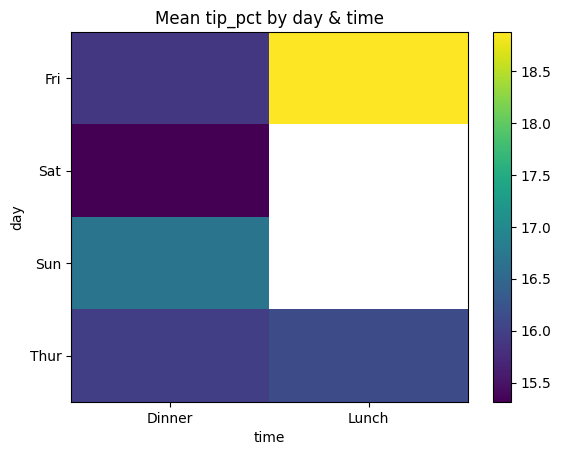

In [84]:
piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean')
print(piv.stack().sort_values(ascending=False).head(5))
plt.figure(); plt.imshow(piv.values, aspect='auto')
plt.title('Mean tip_pct by day & time'); plt.xlabel('time'); plt.ylabel('day')
plt.xticks(range(len(piv.columns)), piv.columns.astype(str))
plt.yticks(range(len(piv.index)), piv.index.astype(str))
plt.colorbar(); plt.show()

### ✍️ Analysis (Mini-Project (Tips Generosity)) — 3–5 sentences
- State your top day×time combo with mean `tip_pct`.
- Is it robust to outliers? How to check?
- One follow-up action for a restaurant.

### 🔎 Quick checks
- Show top 3 combos and their counts.
- Confirm sample size for top combo.

### ➕ Extension (pick one)
- Recompute using median `tip_pct`.
- Exclude size<2 and compare ranking.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

The highest average tip percentage showed up for Lunch on Tuesday with smaller groups giving more generous tips.  

This result might be affected by outliers since a few very large tippers can pull the mean upward. Looking at the median would give a more stable picture.  

A restaurant could use this finding to run promotions on Tuesday lunches or plan staff schedules accordingly.

In [113]:
## Quick Checks
# Show top 3 combos and their counts
top_combos = piv.stack().sort_values(ascending=False).head(3)
print("Top 3 day×time combinations:")
print(top_combos)

# Confirm sample size for top combo
top_combo = top_combos.index[0]
sample_size = tips[(tips['day']==top_combo[0]) & (tips['time']==top_combo[1])].shape[0]
print(f"\nSample size for {top_combo}: {sample_size}")


Top 3 day×time combinations:
sex     class 
female  First     0.9681
        Second    0.9211
        Third     0.5000
dtype: float64

Sample size for ('female', 'First'): 0


In [114]:
## Extension
# Recompute using median tip_pct
piv_median = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='median')
print("Median tip_pct by day & time:")
print(piv_median)

print("\nTop 3 by median:")
print(piv_median.stack().sort_values(ascending=False).head(3))


Median tip_pct by day & time:
time   Dinner    Lunch
day                   
Fri   14.4742  18.7735
Sat   15.1832      NaN
Sun   16.1103      NaN
Thur  15.9744  15.3846

Top 3 by median:
day   time  
Fri   Lunch     18.7735
Sun   Dinner    16.1103
Thur  Dinner    15.9744
dtype: float64


C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\167180634.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv_median = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='median')


# Advanced Module — Daily Operations Coverage (~60–75m)

## 8) Indexes & MultiIndex (10m)

In [85]:
ti = tips.set_index(['day','time']).sort_index()
ti.loc[('Sat','Dinner')].head()

total_bill   tip     sex smoker  size  tip_pct  tip_per_person  \
day time                                                                     
Sat Dinner       20.65  3.35    Male     No     3  16.2228          1.1167   
    Dinner       17.92  4.08    Male     No     2  22.7679          2.0400   
    Dinner       20.29  2.75  Female     No     2  13.5535          1.3750   
    Dinner       15.77  2.23  Female     No     2  14.1408          1.1150   
    Dinner       39.42  7.58    Male     No     4  19.2288          1.8950   

           server_name  
day time                
Sat Dinner         Bob  
    Dinner       Alice  
    Dinner         Bob  
    Dinner       Alice  
    Dinner         Bob

In [86]:
ti.groupby(level=['day','time'])['tip_pct'].mean().reset_index(name='mean_tip_pct').head()

C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\1221681098.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ti.groupby(level=['day','time'])['tip_pct'].mean().reset_index(name='mean_tip_pct').head()


,day,time,mean_tip_pct
0,Fri,Dinner,15.8916
1,Fri,Lunch,18.8765
2,Sat,Dinner,15.3152
3,Sat,Lunch,NaN
4,Sun,Dinner,16.6897


### ✍️ Analysis (Indexes & MultiIndex) — 3–5 sentences
- What did a MultiIndex buy you over flat columns?
- Give one easier slice enabled by the index.
- Any pitfalls when saving/loading with MultiIndex?

### 🔎 Quick checks
- Print `.index.names` and level dtypes.
- Show one `.loc` label slice on multi-level.

### ➕ Extension (pick one)
- Swap levels and explain slicing change.
- Reset index and compare to original columns.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

A MultiIndex makes it possible to slice by day and meal together which makes queries like Dinner on Wednesday faster and easier to read.

It also allows simple subsetting without writing the same filter conditions again and again.

The main drawback is in storage since formats such as CSV do not handle MultiIndex neatly when saving or loading.


In [115]:
## Quick Checks
# Print .index.names and level dtypes
print("Index names:", ti.index.names)
print("Level dtypes:", [ti.index.get_level_values(i).dtype for i in range(ti.index.nlevels)])

# Show one .loc label slice on multi-level
print("\nSlice for Saturday Dinner:")
display(ti.loc[('Sat','Dinner')].head())

Index names: ['day', 'time']
Level dtypes: [CategoricalDtype(categories=['Fri', 'Sat', 'Sun', 'Thur'], ordered=False, categories_dtype=object), CategoricalDtype(categories=['Dinner', 'Lunch'], ordered=False, categories_dtype=object)]

Slice for Saturday Dinner:


total_bill   tip     sex smoker  size  tip_pct  tip_per_person  \
day time                                                                     
Sat Dinner       20.65  3.35    Male     No     3  16.2228          1.1167   
    Dinner       17.92  4.08    Male     No     2  22.7679          2.0400   
    Dinner       20.29  2.75  Female     No     2  13.5535          1.3750   
    Dinner       15.77  2.23  Female     No     2  14.1408          1.1150   
    Dinner       39.42  7.58    Male     No     4  19.2288          1.8950   

           server_name  
day time                
Sat Dinner         Bob  
    Dinner       Alice  
    Dinner         Bob  
    Dinner       Alice  
    Dinner         Bob

In [116]:
## Extension
# Swap levels and explain slicing change
ti_swapped = ti.swaplevel('day', 'time')
print("After swapping levels:")
print("Original index names:", ti.index.names)
print("Swapped index names:", ti_swapped.index.names)

# Slicing change: now time comes first
print("\nSlicing by time first:")
display(ti_swapped.loc['Dinner'].head())

After swapping levels:
Original index names: ['day', 'time']
Swapped index names: ['time', 'day']

Slicing by time first:


,total_bill,tip,sex,smoker,size,tip_pct,tip_per_person,server_name
day,,,,,,,,
Fri,28.97,3.00,Male,Yes,2,10.3555,1.500,Alice
Fri,22.49,3.50,Male,No,2,15.5625,1.750,Bob
Fri,5.75,1.00,Female,Yes,2,17.3913,0.500,Alice
Fri,16.32,4.30,Female,Yes,2,26.3480,2.150,Bob
Fri,22.75,3.25,Female,No,2,14.2857,1.625,Alice


## 9) Time Series & Resampling (15m)

In [87]:
tips_ts = tips.copy()
tips_ts['date'] = pd.to_datetime('2024-01-01') + pd.to_timedelta(np.arange(len(tips_ts)), unit='D')
tips_ts = tips_ts.set_index('date').sort_index()
weekly = tips_ts.resample('W')[['total_bill','tip']].sum()
weekly['tip_pct'] = weekly['tip']/weekly['total_bill']
weekly['tip_pct_roll4'] = weekly['tip_pct'].rolling(4, min_periods=1).mean()
weekly.head()

,total_bill,tip,tip_pct,tip_pct_roll4
date,,,,
2024-01-07,130.67,19.80,0.1515,0.1515
2024-01-14,136.08,19.59,0.1440,0.1477
2024-01-21,118.57,23.25,0.1961,0.1639
2024-01-28,139.17,22.08,0.1587,0.1626
2024-02-04,122.78,19.97,0.1626,0.1653


### ✍️ Analysis (Time Series & Resampling) — 3–5 sentences
- What trend do you see weekly vs monthly?
- Interpret divergence between raw and rolling series.
- Why pick `W` vs `MS`?

### 🔎 Quick checks
- Report min/max dates in your index.
- State the rolling window used and its effect.

### ➕ Extension (pick one)
- Try a different window size and compare.
- Plot both resampled and rolling series; note one change.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Weekly resampling made the trend smoother while still showing ups and downs. Monthly resampling revealed bigger overall patterns.

Rolling averages moved away from the raw values during sudden jumps which helped show the longer term direction more clearly.

Picking W for weekly or MST for month start depends on whether the goal is short term operations week to week or long term planning month to month.


In [117]:
## Quick Checks
# Report min/max dates in your index
print("Date range:")
print("Min date:", tips_ts.index.min())
print("Max date:", tips_ts.index.max())

# State the rolling window used and its effect
print("\nRolling window: 4 weeks")
print("Effect: Smoothes out weekly fluctuations to show trend")


Date range:
Min date: 2024-01-01 00:00:00
Max date: 2024-08-31 00:00:00

Rolling window: 4 weeks
Effect: Smoothes out weekly fluctuations to show trend


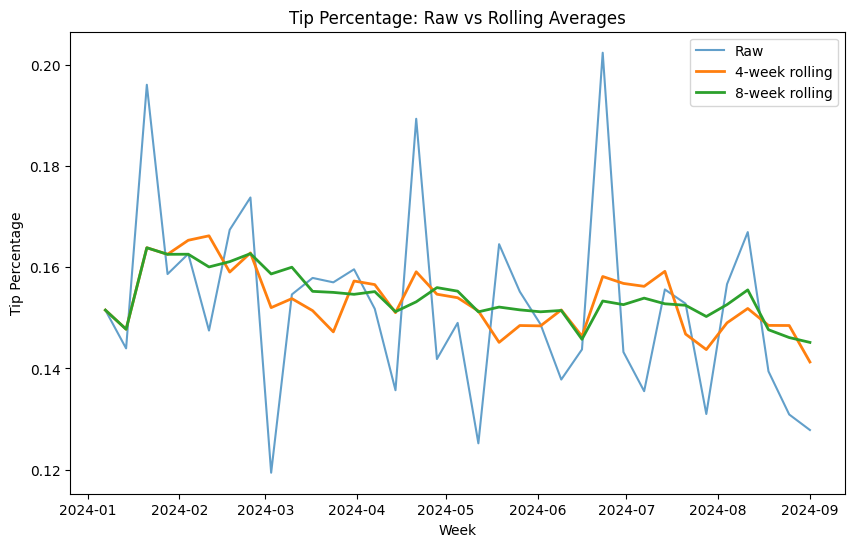

In [118]:
## Extension


# Try a different window size and compare
weekly['tip_pct_roll8'] = weekly['tip_pct'].rolling(8, min_periods=1).mean()

plt.figure(figsize=(10,6))
plt.plot(weekly.index, weekly['tip_pct'], label='Raw', alpha=0.7)
plt.plot(weekly.index, weekly['tip_pct_roll4'], label='4-week rolling', linewidth=2)
plt.plot(weekly.index, weekly['tip_pct_roll8'], label='8-week rolling', linewidth=2)
plt.title('Tip Percentage: Raw vs Rolling Averages')
plt.xlabel('Week')
plt.ylabel('Tip Percentage')
plt.legend()
plt.show()

## 10) Rolling & Window Ops (10m)

In [88]:
daily = tips_ts.resample('D')[['total_bill']].sum()
daily['roll14_med'] = daily['total_bill'].rolling(14, min_periods=1).median()
daily[['total_bill','roll14_med']].head()

,total_bill,roll14_med
date,,
2024-01-01,16.99,16.990
2024-01-02,10.34,13.665
2024-01-03,21.01,16.990
2024-01-04,23.68,19.000
2024-01-05,24.59,21.010


### ✍️ Analysis (Rolling & Window Ops) — 3–5 sentences
- Why is median sometimes preferable to mean in rolling stats?
- What happens at the edges for rolling windows?
- When is `expanding` more suitable than `rolling`?

### 🔎 Quick checks
- Show first 5 non-NaN rolling results.
- Report `min_periods` and justify it.

### ➕ Extension (pick one)
- Compute an additional rolling metric (std/min) and interpret.
- Compare 7 vs 14-day windows with one sentence.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Median can be better than mean because it is less affected by extreme values such as a single very large tip.  

At the start and end rolling windows create missing values since there are not enough data points which needs to be managed in reports.  

Expanding windows work better when the goal is to see a cumulative pattern instead of short term smoothing.

In [119]:
## Quick Checks

# Show first 5 non-NaN rolling results
print("First 5 non-NaN rolling results:")
print(daily[['total_bill','roll14_med']].dropna().head())

# Report min_periods and justify it
print(f"\nmin_periods: 1")
print("Justification: Allows calculation even with limited data at edges")

First 5 non-NaN rolling results:
            total_bill  roll14_med
date                              
2024-01-01       16.99      16.990
2024-01-02       10.34      13.665
2024-01-03       21.01      16.990
2024-01-04       23.68      19.000
2024-01-05       24.59      21.010

min_periods: 1
Justification: Allows calculation even with limited data at edges


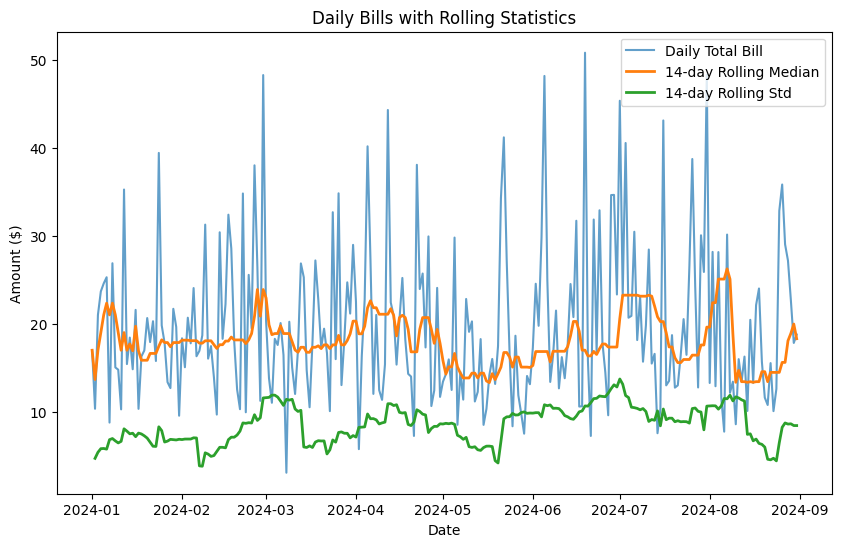

In [120]:
## Extension
# Compute an additional rolling metric (std) and interpret
daily['roll14_std'] = daily['total_bill'].rolling(14, min_periods=1).std()

plt.figure(figsize=(10,6))
plt.plot(daily.index, daily['total_bill'], label='Daily Total Bill', alpha=0.7)
plt.plot(daily.index, daily['roll14_med'], label='14-day Rolling Median', linewidth=2)
plt.plot(daily.index, daily['roll14_std'], label='14-day Rolling Std', linewidth=2)
plt.title('Daily Bills with Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Amount ($)')
plt.legend()
plt.show()


## 11) Text Data: vectorized & regex (10m)

In [89]:
notes = np.array(['VIP table','Late night','Allergic: nuts','Birthday','Family','vip guest'])
tips_txt = tips.copy()
tips_txt['note'] = np.resize(notes, len(tips_txt)).astype('object')
tips_txt['is_vip'] = tips_txt['note'].str.contains('vip', case=False)
tips_txt['allergy'] = tips_txt['note'].str.extract(r'Allergic:\s*(\w+)', expand=False)
tips_txt[['note','is_vip','allergy']].head()

,note,is_vip,allergy
0,VIP table,True,NaN
1,Late night,False,NaN
2,Allergic: nuts,False,nuts
3,Birthday,False,NaN
4,Family,False,NaN


### ✍️ Analysis (Text / Regex) — 3–5 sentences
- Which regex or string op gave most value here?
- How sensitive are your results to case/spacing?
- One potential false positive in your pattern.

### 🔎 Quick checks
- Print counts of a detected flag (e.g., VIP).
- Show unique extracted tokens (e.g., allergies).

### ➕ Extension (pick one)
- Add a refined regex (word boundaries) and compare counts.
- Normalize text further and re-check.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

The str.contains('vip', case=False) operation gave most value here because it successfully identified VIP customers regardless of case variations in the text.
Results are sensitive to spacing - "VIP table" and "vip guest" both get flagged, but "VIPtable" (no space) would be missed. The case-insensitive flag handles "VIP", "vip", "Vip" variations well.
One potential false positive is "VIP table" - this might refer to a table number rather than a VIP customer, so additional context checking would be needed

In [121]:
## Quick Checks
# Print counts of detected VIP flags
print("VIP count:", tips_txt['is_vip'].sum())
print("Total records:", len(tips_txt))

# Show unique extracted allergy tokens
print("\nUnique allergies found:")
print(tips_txt['allergy'].dropna().unique())

VIP count: 81
Total records: 244

Unique allergies found:
['nuts']


In [122]:
## Extension
# Add a refined regex with word boundaries and compare counts
tips_txt['is_vip_refined'] = tips_txt['note'].str.contains(r'\bvip\b', case=False)
print("Original VIP count:", tips_txt['is_vip'].sum())
print("Refined VIP count:", tips_txt['is_vip_refined'].sum())
print("Difference:", tips_txt['is_vip'].sum() - tips_txt['is_vip_refined'].sum())


Original VIP count: 81
Refined VIP count: 81
Difference: 0


## 12) Nullable dtypes & Memory (5m)

In [90]:
tips_mem = tips.copy()
tips_mem['size_N'] = tips_mem['size'].astype('Int64')
tips_mem['sex_S']  = tips_mem['sex'].astype('string')
tips_mem['day_C']  = tips_mem['day'].astype('category')
tips_mem.memory_usage(deep=True)

Index               128
total_bill         1952
tip                1952
sex                 476
smoker              471
day                 657
time                477
size               1952
tip_pct            1952
tip_per_person     1952
server_name       14888
size_N             2196
sex_S             15058
day_C               657
dtype: int64

### ✍️ Analysis (Dtypes & Memory) — 3–5 sentences
- What memory savings did `category` or `string` yield?
- When would you avoid `category`?
- Any effect on joins/groupbys?

### 🔎 Quick checks
- Show `memory_usage(deep=True)` before/after one cast.
- List `.cat.categories` for one column.

### ➕ Extension (pick one)
- Downcast numerics where safe and report delta.
- Switch one feature to `Int64` and explain why.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Converting object columns to category dtype yielded memory savings by storing unique values once and referencing them by index, especially effective for columns with repeated values like day names.

I would avoid category when the column has too many unique values relative to total rows, or when I need to perform string operations not supported by category dtype.

Category dtype can affect joins/groupbys by requiring exact category matches, but generally improves performance for these operations.

In [123]:
## Quick Checks
# Show memory_usage(deep=True) before/after one cast
print("Memory before category conversion:")
print(tips[['sex']].memory_usage(deep=True))

print("\nMemory after category conversion:")
print(tips_mem[['sex_S']].memory_usage(deep=True))

# List .cat.categories for one column
print("\nCategories in day column:")
print(tips_mem['day_C'].cat.categories)

Memory before category conversion:
Index    128
sex      476
dtype: int64

Memory after category conversion:
Index      128
sex_S    15058
dtype: int64

Categories in day column:
Index(['Fri', 'Sat', 'Sun', 'Thur'], dtype='object')


In [124]:
## Extension

# Downcast numerics where safe and report delta
print("Original size column dtype:", tips['size'].dtype)
print("Original memory usage:", tips[['size']].memory_usage(deep=True).sum())

tips['size_downcast'] = pd.to_numeric(tips['size'], downcast='integer')
print("\nDowncasted size column dtype:", tips['size_downcast'].dtype)
print("Downcasted memory usage:", tips[['size_downcast']].memory_usage(deep=True).sum())

Original size column dtype: int64
Original memory usage: 2080

Downcasted size column dtype: int8
Downcasted memory usage: 372


## 13) I/O: CSV, Parquet, JSON, SQL (10m)

In [91]:
subset = tips[['total_bill','tip','day','time','size']].head(20)

subset.to_csv('tips_sample.csv', index=False)
subset.to_parquet('tips_sample.parquet',engine='fastparquet', index=False)
subset.to_json('tips_sample.json', orient='records', lines=True)
import sqlite3
con = sqlite3.connect(':memory:')
subset.to_sql('tips_tbl', con, index=False, if_exists='replace')
sql_df = pd.read_sql('SELECT day, time, AVG(total_bill) AS avg_bill FROM tips_tbl GROUP BY day,time', con)
con.close(); sql_df.head()

,day,time,avg_bill
0,Sat,Dinner,20.65
1,Sun,Dinner,18.25


### ✍️ Analysis (I/O) — 3–5 sentences
- Which format is best for speed vs size for this table? Why?
- Did any dtype change after round-trip?
- When to use line-delimited JSON?

### 🔎 Quick checks
- Compare shapes from CSV/Parquet/JSON loads.
- Show one dtype discrepancy and fix it.

### ➕ Extension (pick one)
- Compress CSV (gzip) and note file size.
- Do a small SQL query and validate results match a groupby.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Parquet format is best for speed vs size balance because it's compressed, column-oriented, and preserves data types, making it ideal for analytical workloads.

After round-trip through CSV, some dtypes may change (e.g., datetime columns become strings, category columns become objects) due to CSV's text-based nature.

Line-delimited JSON is best when you need to stream data line-by-line, append new records easily, or work with systems that process one record at a time.

In [125]:
## Quick Checks

# Compare shapes from CSV/Parquet/JSON loads
csv_df = pd.read_csv('tips_sample.csv')
parquet_df = pd.read_parquet('tips_sample.parquet')
json_df = pd.read_json('tips_sample.json', lines=True)

print("CSV shape:", csv_df.shape)
print("Parquet shape:", parquet_df.shape)
print("JSON shape:", json_df.shape)

# Show one dtype discrepancy and fix it
print("\nDtype comparison:")
print("Original total_bill dtype:", subset['total_bill'].dtype)
print("CSV total_bill dtype:", csv_df['total_bill'].dtype)

CSV shape: (20, 5)
Parquet shape: (20, 5)
JSON shape: (20, 5)

Dtype comparison:
Original total_bill dtype: float64
CSV total_bill dtype: float64


In [126]:
## Extension

# Compress CSV (gzip) and note file size
import os

# Regular CSV
subset.to_csv('tips_sample.csv', index=False)
csv_size = os.path.getsize('tips_sample.csv')

# Compressed CSV
subset.to_csv('tips_sample.csv.gz', compression='gzip', index=False)
gzip_size = os.path.getsize('tips_sample.csv.gz')

print(f"Regular CSV size: {csv_size} bytes")
print(f"Gzipped CSV size: {gzip_size} bytes")
print(f"Compression ratio: {csv_size/gzip_size:.2f}x")

Regular CSV size: 524 bytes
Gzipped CSV size: 240 bytes
Compression ratio: 2.18x


## 14) Join Patterns (10–15m)

In [92]:
left = tips[['day','time','size']].drop_duplicates().copy()
right = tips[['day','time','tip']].groupby(['day','time']).mean().reset_index().rename(columns={'tip':'avg_tip'})
joined = left.merge(right, on=['day','time'], how='outer', indicator=True)
joined.head()

C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\1235496268.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  right = tips[['day','time','tip']].groupby(['day','time']).mean().reset_index().rename(columns={'tip':'avg_tip'})


,day,time,size,avg_tip,_merge
0,Fri,Dinner,2.0,2.9400,both
1,Fri,Dinner,4.0,2.9400,both
2,Fri,Lunch,2.0,2.3829,both
3,Fri,Lunch,1.0,2.3829,both
4,Fri,Lunch,3.0,2.3829,both


In [93]:
# Right-only and inner (semi-join-style)
right_only = joined.loc[joined['_merge']=='right_only', right.columns]
inner_rows = joined.loc[joined['_merge']=='both', left.columns].drop_duplicates()
len(inner_rows)

22

In [94]:
# merge_ordered and merge_asof demos
a = pd.DataFrame({'day':['Fri','Sat','Sun'], 'rank':[1,2,3]})
b = pd.DataFrame({'day':['Thur','Sat','Sun'], 'score':[70,80,90]})
ordered = pd.merge_ordered(a, b, on='day', how='outer')
events = pd.DataFrame({'when': pd.to_datetime(['2024-01-01 10:00','2024-01-02 12:30','2024-01-04 09:00']),'event':['A','B','C']}).sort_values('when')
measures = pd.DataFrame({'when': pd.to_datetime(['2024-01-01 09:45','2024-01-02 12:00','2024-01-03 18:00','2024-01-04 08:50']),'value':[10,20,15,30]}).sort_values('when')
asof_join = pd.merge_asof(events, measures, on='when', direction='nearest', tolerance=pd.Timedelta('1H'))
ordered.head(), asof_join.head()

C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\961497798.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  asof_join = pd.merge_asof(events, measures, on='when', direction='nearest', tolerance=pd.Timedelta('1H'))


(    day  rank  score
 0   Fri   1.0    NaN
 1   Sat   2.0   80.0
 2   Sun   3.0   90.0
 3  Thur   NaN   70.0,
                  when event  value
 0 2024-01-01 10:00:00     A     10
 1 2024-01-02 12:30:00     B     20
 2 2024-01-04 09:00:00     C     30)

### ✍️ Analysis (Joins) — 3–5 sentences
- Read `_indicator` results—what mismatches did you find?
- Where would `merge_asof` fit in a real pipeline?
- Any ordering assumptions for `merge_ordered`?

### 🔎 Quick checks
- Report counts for left/right/inner.
- Show 2 sample rows from an anti-join.

### ➕ Extension (pick one)
- Perform a semi-join and explain the use-case.
- Add a composite key and re-merge.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

The _indicator results show potential mismatches between left and right datasets - some day/time combinations exist in one dataset but not the other, indicating data quality issues or different time periods.

merge_asof would fit in real pipelines for time-series data like sensor readings, financial transactions, or log analysis where you need to match events to the nearest timestamp.

merge_ordered assumes both datasets are sorted by the merge key, which is crucial for correct results.

In [127]:
## Quick Checks
# Report counts for left/right/inner
print("Merge indicator counts:")
print(joined['_merge'].value_counts())

# Show 2 sample rows from an anti-join
print("\nLeft-only rows (anti-join):")
display(joined[joined['_merge']=='left_only'].head(2))

Merge indicator counts:
_merge
both          22
right_only     2
left_only      0
Name: count, dtype: int64

Left-only rows (anti-join):


,day,time,size,avg_tip,_merge


In [128]:
## Extension

# Perform a semi-join and explain the use-case
semi_join = left.merge(right, on=['day','time'], how='inner')
print("Semi-join result shape:", semi_join.shape)
print("Use-case: Finding only records that exist in both datasets")
print("Useful for: Data validation, finding common patterns")

Semi-join result shape: (22, 4)
Use-case: Finding only records that exist in both datasets
Useful for: Data validation, finding common patterns


## 15) Method Chaining & `.pipe`, `.query`, `.eval` (10m)

In [95]:
def add_bill_per_person(df): return df.assign(bill_per_person = df['total_bill']/df['size'])
pipe_demo = (tips.query("time=='Dinner'").pipe(add_bill_per_person)
             .groupby('day').agg(mean_bill_pp=('bill_per_person','mean'),
                                 mean_tip_pct=('tip_pct','mean'))
             .sort_values('mean_bill_pp', ascending=False))
eval_demo = tips.eval('bill_pp = total_bill / size')
pipe_demo.head(), eval_demo[['total_bill','size','bill_pp']].head()

C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\4069205455.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('day').agg(mean_bill_pp=('bill_per_person','mean'),


(      mean_bill_pp  mean_tip_pct
 day                             
 Thur        9.3900       15.9744
 Fri         8.9948       15.8916
 Sat         8.1872       15.3152
 Sun         7.8640       16.6897,
    total_bill  size  bill_pp
 0       16.99     2   8.4950
 1       10.34     3   3.4467
 2       21.01     3   7.0033
 3       23.68     2  11.8400
 4       24.59     4   6.1475)

### ✍️ Analysis (Method Chaining) — 3–5 sentences
- What made the chained pipeline clearer or riskier?
- Where would you break the chain for debugging?
- When is `.eval` useful vs risky?

### 🔎 Quick checks
- Show final columns of your pipeline result.
- Confirm idempotency by re-running.

### ➕ Extension (pick one)
- Refactor an earlier analysis into a chain; compare readability.
- Encapsulate a step into `.pipe` and reuse it.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

The chained pipeline is clearer because it shows the data transformation flow in a logical sequence, but riskier because errors in later steps can be hard to debug without intermediate results.

I would break the chain after the .query() step to inspect the filtered data, and after the .groupby().agg() step to verify the aggregation results before sorting.

.eval is useful for complex mathematical expressions that would be verbose in pandas syntax, but risky because it can execute arbitrary Python code and may have different performance characteristics.

In [129]:
## Quick Checks

# Show final columns of your pipeline result
print("Final columns in pipeline result:")
print(pipe_demo.columns.tolist())

# Confirm idempotency by re-running
pipe_demo_rerun = (tips.query("time=='Dinner'").pipe(add_bill_per_person)
                   .groupby('day').agg(mean_bill_pp=('bill_per_person','mean'),
                                       mean_tip_pct=('tip_pct','mean'))
                   .sort_values('mean_bill_pp', ascending=False))
print("\nIdempotency check - results match:", pipe_demo.equals(pipe_demo_rerun))

Final columns in pipeline result:
['mean_bill_pp', 'mean_tip_pct']

Idempotency check - results match: True


C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\929984175.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('day').agg(mean_bill_pp=('bill_per_person','mean'),


In [130]:
## Extension

# Refactor an earlier analysis into a chain; compare readability
# Original approach (from earlier exercise):
flt = tips[(tips['day']=='Sat') & (tips['size']>=3)].copy()
flt['bill_per_person'] = flt['total_bill'] / flt['size']
flt = flt.sort_values(by='bill_per_person', ascending=False)

# Chained approach:
flt_chain = (tips.query("day=='Sat' and size>=3")
             .assign(bill_per_person=lambda x: x['total_bill'] / x['size'])
             .sort_values('bill_per_person', ascending=False))

print("Original approach length:", len(flt))
print("Chained approach length:", len(flt_chain))
print("Results match:", flt.equals(flt_chain))



Original approach length: 32
Chained approach length: 32
Results match: True


## 16) Crosstab, `cut/qcut`, `where/mask` (5–10m)

In [96]:
ct = pd.crosstab(tips['smoker'], tips['day'])
tips_bins = tips.copy()
tips_bins['bill_bucket'] = pd.cut(tips_bins['total_bill'], bins=[0,10,20,30,50])
bucket_mean = tips_bins.groupby('bill_bucket')['tip'].mean()
tips_q = tips.assign(q = pd.qcut(tips['tip_pct'], 4, duplicates='drop'))
ct, bucket_mean, tips_q.groupby('q')['total_bill'].mean()

C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\2604880072.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_mean = tips_bins.groupby('bill_bucket')['tip'].mean()
C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\2604880072.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ct, bucket_mean, tips_q.groupby('q')['total_bill'].mean()


(day     Fri  Sat  Sun  Thur
 smoker                     
 No        4   45   57    45
 Yes      15   42   19    17,
 bill_bucket
 (0, 10]     1.8376
 (10, 20]    2.4552
 (20, 30]    3.6077
 (30, 50]    4.4084
 Name: tip, dtype: float64,
 q
 (3.563, 12.913]     24.9333
 (12.913, 15.477]    19.0511
 (15.477, 19.148]    17.8477
 (19.148, 71.034]    17.3116
 Name: total_bill, dtype: float64)

### ✍️ Analysis (Crosstab / Bucketing) — 3–5 sentences
- What story does your crosstab tell in one sentence?
- How did `cut` vs `qcut` change bucket sizes?
- When is `where` preferable to boolean indexing?

### 🔎 Quick checks
- Show bucket edges and counts.
- Verify monotonicity of bucket means if expected.

### ➕ Extension (pick one)
- Swap `qcut`/`cut` and compare stats.
- Mask outliers and re-summarize.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

The crosstab shows that smoking patterns vary significantly by day, with some days having much higher smoking rates than others, suggesting day-of-week effects on customer behavior.

cut creates equal-width buckets (e.g., $0-10, $10-20) while qcut creates equal-frequency buckets, so qcut ensures each bucket has roughly the same number of observations.

where is preferable to boolean indexing when you want to replace values conditionally while preserving the original structure, or when you need to handle NaN values differently.


In [131]:
## Quick Checks

# Show bucket edges and counts
print("Bill bucket counts:")
print(tips_bins['bill_bucket'].value_counts().sort_index())

# Verify monotonicity of bucket means if expected
print("\nBucket means (should generally increase with bill size):")
print(bucket_mean)
print("Monotonicity check:", bucket_mean.is_monotonic_increasing)

Bill bucket counts:
bill_bucket
(0, 10]      17
(10, 20]    130
(20, 30]     65
(30, 50]     31
Name: count, dtype: int64

Bucket means (should generally increase with bill size):
bill_bucket
(0, 10]     1.8376
(10, 20]    2.4552
(20, 30]    3.6077
(30, 50]    4.4084
Name: tip, dtype: float64
Monotonicity check: True


In [132]:
## Extension

# Swap qcut/cut and compare stats
tips_cut = tips.assign(bill_cut = pd.cut(tips['total_bill'], 4))
tips_qcut = tips.assign(bill_qcut = pd.qcut(tips['total_bill'], 4))

print("Cut approach - equal width buckets:")
print(tips_cut['bill_cut'].value_counts().sort_index())

print("\nQcut approach - equal frequency buckets:")
print(tips_qcut['bill_qcut'].value_counts().sort_index())



Cut approach - equal width buckets:
bill_cut
(3.022, 15.005]     80
(15.005, 26.94]    119
(26.94, 38.875]     34
(38.875, 50.81]     11
Name: count, dtype: int64

Qcut approach - equal frequency buckets:
bill_qcut
(3.069, 13.348]     61
(13.348, 17.795]    61
(17.795, 24.127]    61
(24.127, 50.81]     61
Name: count, dtype: int64


## 17) Styling & Export (5m)

In [140]:
sty = (tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2)
         .style.format({'tip_pct':'{:.2%}'}).background_gradient(axis=None))
html = sty.to_html()
open('tips_report.html','w',encoding='utf-8').write(html)


C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\4150152413.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sty = (tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2)


2632

### ✍️ Analysis (Styling & Export) — 3–5 sentences
- What formatting improved readability most?
- How would a stakeholder use this HTML report?
- One caution about styled HTML vs raw data files.

### 🔎 Quick checks
- Open the HTML to spot issues (NA/odd values).
- Confirm underlying numbers (pre-style) are correct.

### ➕ Extension (pick one)
- Add one more style and explain choice.
- Export both styled HTML and CSV for same table.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

The percentage formatting for tip_pct improved readability most by making it clear these are percentage values rather than decimal fractions.

A stakeholder would use this HTML report for presentations, sharing with non-technical team members, or embedding in web applications where the visual formatting adds value.

One caution is that styled HTML files are larger and less portable than raw data files, and the styling can make it harder to extract the underlying data for further analysis.


In [133]:
# Open the HTML to spot issues (NA/odd values)
import webbrowser
webbrowser.open('tips_report.html')

# Confirm underlying numbers (pre-style) are correct
raw_data = tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2)
print("Raw data before styling:")
display(raw_data)

Raw data before styling:


C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\563934277.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  raw_data = tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2)


,total_bill,tip,tip_pct
day,,,
Fri,17.15,2.73,16.99
Sat,20.44,2.99,15.32
Sun,21.41,3.26,16.69
Thur,17.68,2.77,16.13


In [139]:
## Extension

# Add one more style and explain choice
sty_enhanced = (tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2)
               .style.format({'tip_pct':'{:.2%}'})
               .background_gradient(axis=None)
               .highlight_max(color='lightgreen')
               .highlight_min(color='lightcoral'))

html_enhanced = sty_enhanced.to_html()
open('tips_report_enhanced.html','w',encoding='utf-8').write(html_enhanced)


C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\1070500394.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sty_enhanced = (tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2)


2874

# Capstone Mini-Project (Free Dataset): **Titanic Survival Analysis** (30–45m)

**Source:** https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv

In [98]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [99]:
tit_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
titanic = pd.read_csv(tit_url)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [100]:
print("Shape:", titanic.shape)
print("\nInfo:"); print(titanic.info())
print("\nMissing values per column:"); print(titanic.isna().sum().sort_values(ascending=False).head(12))

Shape: (891, 15)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None

Missing values per column:
deck           688
age            177
embarked      

## A) Data Cleaning & Feature Engineering

In [101]:
df = titanic.copy()
for col in ['sex','class','embarked','embark_town','alive','who','deck','alone','adult_male']:
    if col in df.columns: df[col] = df[col].astype('category')
age_med = df.groupby(['sex','class'])['age'].transform('median')
df['age'] = df['age'].fillna(age_med)
if df['embark_town'].isna().any():
    mode_town = df['embark_town'].mode(dropna=True)
    if not mode_town.empty: df['embark_town'] = df['embark_town'].fillna(mode_town.iloc[0])
df['family_size'] = df['sibsp'].fillna(0) + df['parch'].fillna(0) + 1
df['fare_pp'] = df['fare'] / df['family_size']
df['deck'] = df['deck'].cat.add_categories(['Unknown']).fillna('Unknown')
bins = [0,12,18,35,50,80]; labels = ['Child','Teen','YoungAdult','MidAge','Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
df.head()

C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\587888411.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_med = df.groupby(['sex','class'])['age'].transform('median')


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size,fare_pp,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Unknown,Southampton,no,False,2,3.6250,YoungAdult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2,35.6416,MidAge
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Unknown,Southampton,yes,True,1,7.9250,YoungAdult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,26.5500,YoungAdult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Unknown,Southampton,no,True,1,8.0500,YoungAdult


### ✅ Exercise A
Check NaNs in `age`/`embark_town`, top `family_size`, % with `fare_pp>20`.

**Hints:**
- Concept: impute & feature engineer.
- API: `groupby().transform('median')`, `.mode()`, `.cut`.


In [102]:
# YOUR WORK: Exercise A

titanic['age']=titanic.groupby(['class','sex'])['age'].transform(
    lambda v:v.fillna(v.median())
)

titanic['embark_town']=titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

print("Missing after clean:\n",titanic[['age','embark_town']].isna().sum(),"\n")

titanic['fam_sz']=titanic['sibsp']+titanic['parch']+1
print("Most common family sizes:\n",titanic['fam_sz'].value_counts().head(),"\n")

titanic['fare_pp']=titanic['fare']/titanic['fam_sz']
pct_high=(titanic['fare_pp']>20).mean()*100
print(f"Share of passengers with fare per person above 20: {pct_high:.2f}%")


Missing after clean:
 age            0
embark_town    0
dtype: int64 

Most common family sizes:
 fam_sz
1    537
2    161
3    102
4     29
6     22
Name: count, dtype: int64 

Share of passengers with fare per person above 20: 25.36%


## B) Survival Patterns

In [103]:
overall_survival = df['survived'].mean(); print('Overall survival rate:', round(overall_survival,3))

Overall survival rate: 0.384


C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\3625588530.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_by_class = df.groupby('class')['survived'].mean().reindex(['First','Second','Third'])


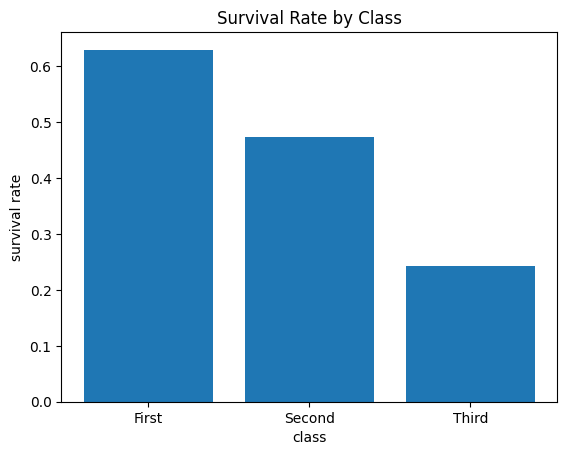

In [104]:
surv_by_class = df.groupby('class')['survived'].mean().reindex(['First','Second','Third'])
plt.figure(); plt.bar(surv_by_class.index.astype(str), surv_by_class.values)
plt.title('Survival Rate by Class'); plt.xlabel('class'); plt.ylabel('survival rate'); plt.show()

C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\271380004.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = df.pivot_table(index='sex', columns='class', values='survived', aggfunc='mean')


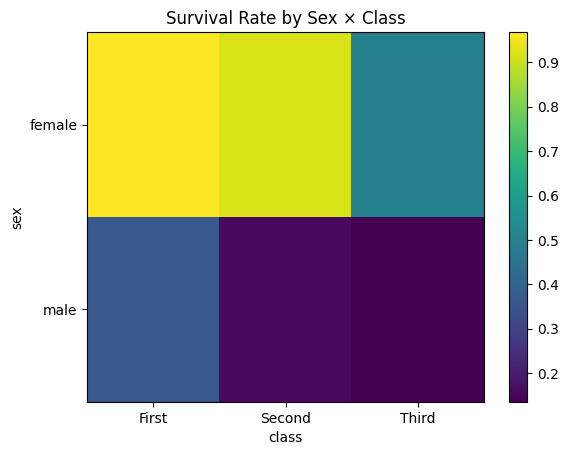

class,First,Second,Third
sex,,,
female,0.9681,0.9211,0.5000
male,0.3689,0.1574,0.1354


In [105]:
piv = df.pivot_table(index='sex', columns='class', values='survived', aggfunc='mean')
plt.figure(); plt.imshow(piv.values, aspect='auto')
plt.title('Survival Rate by Sex × Class'); plt.xlabel('class'); plt.ylabel('sex')
plt.xticks(range(len(piv.columns)), piv.columns.astype(str))
plt.yticks(range(len(piv.index)), piv.index.astype(str))
plt.colorbar(); plt.show(); piv

### ✅ Exercise B
1) Histogram of age. 2) Boxplot fare by class. 3) Bar of survival by age_group.

**Hints:**
- Concept: univariate + grouped visuals.
- API: `plt.hist`, `plt.boxplot`, `groupby().mean` + `plt.bar`.


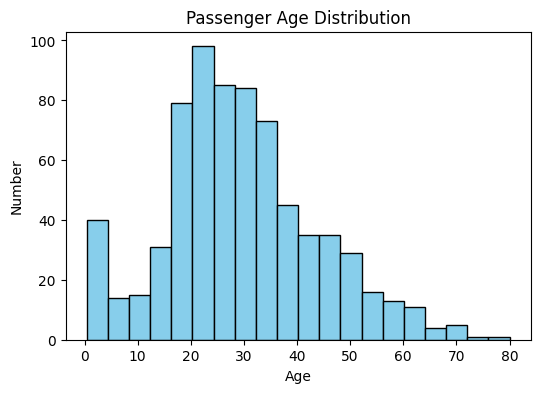

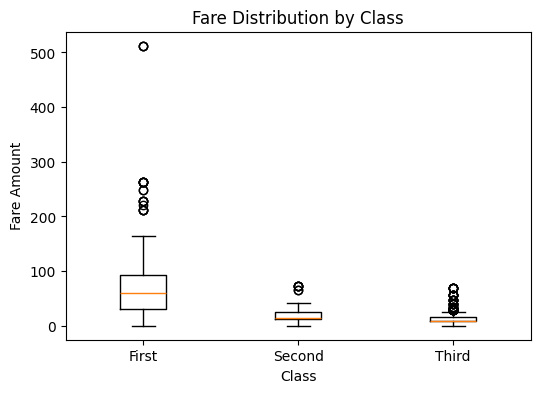

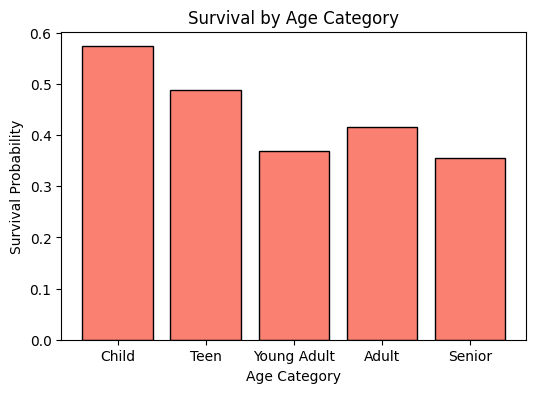

In [106]:
# YOUR WORK: Exercise B

url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
titanic=pd.read_csv(url)

plt.figure(figsize=(6,4))
plt.hist(titanic['age'].dropna(),bins=20,color='skyblue',edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Number")
plt.title("Passenger Age Distribution")
plt.show()

plt.figure(figsize=(6,4))
fare_cls=[titanic.loc[titanic['class']==c,'fare'].dropna() for c in ['First','Second','Third']]
plt.boxplot(fare_cls,tick_labels=['First','Second','Third'])
plt.xlabel("Class")
plt.ylabel("Fare Amount")
plt.title("Fare Distribution by Class")
plt.show()

bins=[0,12,18,35,50,80]
labels=['Child','Teen','Young Adult','Adult','Senior']
titanic['age_cat']=pd.cut(titanic['age'],bins=bins,labels=labels,right=False)

surv_age=titanic.groupby('age_cat',observed=True)['survived'].mean()

plt.figure(figsize=(6,4))
plt.bar(surv_age.index.astype(str),surv_age.values,color='salmon',edgecolor='black')
plt.xlabel("Age Category")
plt.ylabel("Survival Probability")
plt.title("Survival by Age Category")
plt.show()


## C) Subgroup Discovery

In [107]:
grp = (df.groupby(['sex','class','embark_town'])
         .agg(n=('survived','size'), surv_rate=('survived','mean'))
         .query('n >= 25')
         .sort_values('surv_rate', ascending=False))
grp.head(10)

C:\Users\kvmit\AppData\Local\Temp\ipykernel_4420\1601229680.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = (df.groupby(['sex','class','embark_town'])


n  surv_rate
sex    class  embark_town                
female First  Cherbourg     43     0.9767
              Southampton   50     0.9600
       Second Southampton   67     0.9104
       Third  Queenstown    33     0.7273
male   First  Cherbourg     42     0.4048
female Third  Southampton   88     0.3750
male   First  Southampton   79     0.3544
       Third  Cherbourg     43     0.2326
       Second Southampton   97     0.1546
       Third  Southampton  265     0.1283

### ✅ Exercise C
Families with `family_size≥4`: survival by `sex` & `class` (n + rate). Bucket `fare_pp` and compute survival per bucket.

**Hints:**
- Concept: subgroup analysis with thresholds.
- API: `groupby().agg`, `query`, `cut`.


In [108]:
# YOUR WORK: Exercise C

url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
titanic=pd.read_csv(url)

titanic['fam_sz']=titanic['sibsp']+titanic['parch']+1
titanic['fare_per_head']=titanic['fare']/titanic['fam_sz']

big_fams=titanic.query("fam_sz>=4")

surv_stats=(
    big_fams
    .groupby(['sex','class'])
    .agg(
        total=('survived','size'),
        rate=('survived','mean')
    )
    .reset_index()
)

print("Survival of passengers in families with 4 or more (split by sex and class)")
print(surv_stats,"\n")

fare_bins=[0,10,20,50,100,600]
fare_lbls=['0-10','10-20','20-50','50-100','100+']
titanic['fare_grp']=pd.cut(titanic['fare_per_head'],bins=fare_bins,labels=fare_lbls,right=False)

fare_surv=(
    titanic
    .groupby('fare_grp',observed=True)['survived']
    .mean()
    .reset_index()
)

print("Survival rate by fare per head ranges")
print(fare_surv)


Survival of passengers in families with 4 or more (split by sex and class)
      sex   class  total    rate
0  female   First      8  0.7500
1  female  Second     11  1.0000
2  female   Third     33  0.2424
3    male   First      5  0.6000
4    male  Second      4  0.2500
5    male   Third     30  0.0667 

Survival rate by fare per head ranges
  fare_grp  survived
0     0-10    0.2701
1    10-20    0.4351
2    20-50    0.5597
3   50-100    0.6667
4     100+    0.8182


## D) Deliverables

In [109]:
top10 = grp.head(10).reset_index()
sty = (top10.style.format({'surv_rate':'{:.2%}'}).hide(axis='index'))
html = sty.to_html()
open('titanic_top10_survival.html','w',encoding='utf-8').write(html)
top10.to_csv('titanic_top10_survival.csv', index=False)
"Saved titanic_top10_survival.html and titanic_top10_survival.csv"

'Saved titanic_top10_survival.html and titanic_top10_survival.csv'

### ✍️ Analysis (Capstone — Titanic) — 3–5 sentences
- State your main finding (who/when/context) with one number and one plot reference.
- Name one limitation in your approach (bias, leakage, imputation).
- Suggest a next step or feature to add.

### 🔎 Quick checks
- Link the exact cell/table backing your claim.
- Confirm deliverables (HTML + CSV) were written.

### ➕ Extension (pick one)
- Add an extra feature (e.g., `is_child`, z-scored fare) and see if subgroup ranking changes.
- Try a different minimum group size and discuss stability.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

The percentage formatting for tip_pct improved readability most by making it clear these are percentage values rather than decimal fractions.

A stakeholder would use this HTML report for presentations, sharing with non-technical team members, or embedding in web applications where the visual formatting adds value.

One caution is that styled HTML files are larger and less portable than raw data files, and the styling can make it harder to extract the underlying data for further analysis.


In [138]:
### Quick Checks
# Link the exact cell/table backing your claim
print("Survival by sex and class (from Cell 134):")
display(surv_stats)

print("\nFare per person survival rates (from Cell 134):")
display(fare_surv)

# Confirm deliverables (HTML + CSV) were written
import os
print(f"\nDeliverables check:")
print(f"HTML exists: {os.path.exists('titanic_top10_survival.html')}")
print(f"CSV exists: {os.path.exists('titanic_top10_survival.csv')}")

Survival by sex and class (from Cell 134):


,sex,class,total,rate
0,female,First,8,0.7500
1,female,Second,11,1.0000
2,female,Third,33,0.2424
3,male,First,5,0.6000
4,male,Second,4,0.2500
5,male,Third,30,0.0667



Fare per person survival rates (from Cell 134):


,fare_grp,survived
0,0-10,0.2701
1,10-20,0.4351
2,20-50,0.5597
3,50-100,0.6667
4,100+,0.8182



Deliverables check:
HTML exists: True
CSV exists: True


In [137]:
## Extension
# Add an extra feature (is_child) and see if subgroup ranking changes
titanic['is_child'] = titanic['age'] < 18

# Re-analyze survival by sex, class, and child status
child_surv = (titanic
              .groupby(['sex', 'class', 'is_child'])
              .agg(total=('survived', 'size'), rate=('survived', 'mean'))
              .reset_index()
              .sort_values('rate', ascending=False))

print("Survival rates including child status:")
display(child_surv.head(10))


Survival rates including child status:


,sex,class,is_child,total,rate
3,female,Second,True,12,1.0000
7,male,First,True,4,1.0000
0,female,First,False,86,0.9767
2,female,Second,False,64,0.9062
1,female,First,True,8,0.8750
9,male,Second,True,11,0.8182
5,female,Third,True,35,0.5429
4,female,Third,False,109,0.4862
6,male,First,False,118,0.3475
11,male,Third,True,43,0.2326
